In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from keras import optimizers, losses, activations, models
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [2]:
training_dir = 'C:/Users/ASUS/Desktop/VRolloff/train'
validation_dir = 'C:/Users/ASUS/Desktop/VRolloff/valid'
test_dir = 'C:/Users/ASUS/Desktop/VRolloff/test'

In [3]:
image_files = glob(training_dir + '/*/*.png')
valid_image_files = glob(validation_dir + '/*/*.png')

In [4]:
folders = glob(training_dir + '/*')
num_classes = len(folders)
print ('Total Classes = ' + str(num_classes))

Total Classes = 2


In [5]:
import tensorflow as tf 
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Flatten, Dense
#from keras.preprocessing import image

IMAGE_SIZE = [64, 64]  # we will keep the image size as (64,64). You can increase the size for better results. 

# loading the weights of VGG16 without the top layer. These weights are trained on Imagenet dataset.
vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)  # input_shape = (64,64,3) as required by VGG

for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
#x = Dense(128, activation = 'relu')(x)   # we can add a new fully connected layer but it will increase the execution time.
x = Dense(num_classes, activation = 'softmax')(x)  # adding the output layer with softmax function as this is a multi label classification problem.

model = Model(inputs = vgg.input, outputs = x)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [7]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input

training_datagen = ImageDataGenerator(
                                    rescale=1./255,   # all pixel values will be between 0 an 1
                                    shear_range=0, 
                                    zoom_range=0,
                                    horizontal_flip=False,
                                    preprocessing_function=preprocess_input)

validation_datagen = ImageDataGenerator(rescale = 1./255, preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(rescale = 1./255, preprocessing_function=preprocess_input)

training_generator = training_datagen.flow_from_directory(training_dir, target_size = IMAGE_SIZE, batch_size = 200, class_mode = 'categorical')
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size = IMAGE_SIZE, batch_size = 200, class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory(test_dir, target_size = IMAGE_SIZE, batch_size = 200, class_mode = 'categorical')

Found 495 images belonging to 2 classes.
Found 145 images belonging to 2 classes.
Found 66 images belonging to 2 classes.


In [8]:
import tensorflow as tf
from keras.models import *
from keras.layers import *
opt = tf.optimizers.Adam(lr=1e-3)
model.compile(optimizer=opt, 
    loss=losses.binary_crossentropy, 
    metrics=['accuracy', 'Precision', 'AUC', tf.keras.metrics.Recall(), tf.keras.metrics.TrueNegatives()])

C:\Users\ASUS\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [9]:
training_images = 495
validation_images = 145

history = model.fit(training_generator, # this should be equal to total number of images in training set. But to speed up the execution, I am only using 10000 images. Change this for better results. 
                   epochs = 100,  # change this for better results
                   validation_data = validation_generator)  # this should be equal to total number of images in validation set.

Epoch 1/100
3/3 [==============================] - 22s 8s/step - loss: 0.7744 - accuracy: 0.5253 - precision: 0.5253 - auc: 0.5405 - recall: 0.5253 - true_negatives: 260.0000 - val_loss: 0.7446 - val_accuracy: 0.5172 - val_precision: 0.5172 - val_auc: 0.4081 - val_recall: 0.5172 - val_true_negatives: 75.0000
Epoch 2/100
3/3 [==============================] - 17s 7s/step - loss: 0.6723 - accuracy: 0.5919 - precision: 0.5919 - auc: 0.6433 - recall: 0.5919 - true_negatives: 293.0000 - val_loss: 0.7425 - val_accuracy: 0.3172 - val_precision: 0.3172 - val_auc: 0.2734 - val_recall: 0.3172 - val_true_negatives: 46.0000
Epoch 3/100
3/3 [==============================] - 16s 5s/step - loss: 0.6585 - accuracy: 0.6929 - precision: 0.6929 - auc: 0.7166 - recall: 0.6929 - true_negatives: 343.0000 - val_loss: 0.7726 - val_accuracy: 0.3448 - val_precision: 0.3448 - val_auc: 0.3063 - val_recall: 0.3448 - val_true_negatives: 50.0000
Epoch 4/100
3/3 [==============================] - 18s 8s/step - loss:

3/3 [==============================] - 17s 6s/step - loss: 0.5171 - accuracy: 0.7374 - precision: 0.7374 - auc: 0.8292 - recall: 0.7374 - true_negatives: 365.0000 - val_loss: 0.7922 - val_accuracy: 0.4276 - val_precision: 0.4276 - val_auc: 0.4065 - val_recall: 0.4276 - val_true_negatives: 62.0000
Epoch 28/100
3/3 [==============================] - 19s 6s/step - loss: 0.5155 - accuracy: 0.7475 - precision: 0.7475 - auc: 0.8300 - recall: 0.7475 - true_negatives: 370.0000 - val_loss: 0.7924 - val_accuracy: 0.4483 - val_precision: 0.4483 - val_auc: 0.4168 - val_recall: 0.4483 - val_true_negatives: 65.0000
Epoch 29/100
3/3 [==============================] - 20s 8s/step - loss: 0.5122 - accuracy: 0.7495 - precision: 0.7495 - auc: 0.8330 - recall: 0.7495 - true_negatives: 371.0000 - val_loss: 0.7880 - val_accuracy: 0.4414 - val_precision: 0.4414 - val_auc: 0.4112 - val_recall: 0.4414 - val_true_negatives: 64.0000
Epoch 30/100
3/3 [==============================] - 19s 6s/step - loss: 0.5100 -

3/3 [==============================] - 22s 7s/step - loss: 0.4703 - accuracy: 0.7717 - precision: 0.7717 - auc: 0.8653 - recall: 0.7717 - true_negatives: 382.0000 - val_loss: 0.7984 - val_accuracy: 0.4897 - val_precision: 0.4897 - val_auc: 0.4442 - val_recall: 0.4897 - val_true_negatives: 71.0000
Epoch 54/100
3/3 [==============================] - 25s 10s/step - loss: 0.4689 - accuracy: 0.7717 - precision: 0.7717 - auc: 0.8660 - recall: 0.7717 - true_negatives: 382.0000 - val_loss: 0.7999 - val_accuracy: 0.4897 - val_precision: 0.4897 - val_auc: 0.4438 - val_recall: 0.4897 - val_true_negatives: 71.0000
Epoch 55/100
3/3 [==============================] - 27s 9s/step - loss: 0.4678 - accuracy: 0.7798 - precision: 0.7798 - auc: 0.8668 - recall: 0.7798 - true_negatives: 386.0000 - val_loss: 0.7993 - val_accuracy: 0.4690 - val_precision: 0.4690 - val_auc: 0.4393 - val_recall: 0.4690 - val_true_negatives: 68.0000
Epoch 56/100
3/3 [==============================] - 19s 6s/step - loss: 0.4664 

3/3 [==============================] - 21s 7s/step - loss: 0.4389 - accuracy: 0.7919 - precision: 0.7919 - auc: 0.8874 - recall: 0.7919 - true_negatives: 392.0000 - val_loss: 0.8106 - val_accuracy: 0.4897 - val_precision: 0.4897 - val_auc: 0.4468 - val_recall: 0.4897 - val_true_negatives: 71.0000
Epoch 80/100
3/3 [==============================] - 18s 6s/step - loss: 0.4375 - accuracy: 0.7919 - precision: 0.7919 - auc: 0.8885 - recall: 0.7919 - true_negatives: 392.0000 - val_loss: 0.8111 - val_accuracy: 0.4759 - val_precision: 0.4759 - val_auc: 0.4446 - val_recall: 0.4759 - val_true_negatives: 69.0000
Epoch 81/100
3/3 [==============================] - 19s 6s/step - loss: 0.4368 - accuracy: 0.7899 - precision: 0.7899 - auc: 0.8889 - recall: 0.7899 - true_negatives: 391.0000 - val_loss: 0.8109 - val_accuracy: 0.4690 - val_precision: 0.4690 - val_auc: 0.4427 - val_recall: 0.4690 - val_true_negatives: 68.0000
Epoch 82/100
3/3 [==============================] - 20s 9s/step - loss: 0.4352 -

In [10]:
import statistics
print (statistics.mean(history.history['accuracy']))
print (statistics.mean(history.history['val_accuracy']))

0.7578787869215011
0.43944827377796175


loss


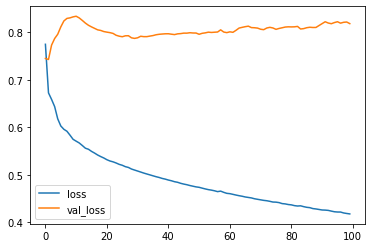

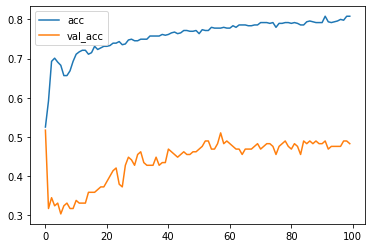

In [11]:
#Some visualizations
import matplotlib.pyplot as plt
#Loss
plt.plot(history.history['loss'],label='loss')
print('loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
#Accuracy
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()

In [12]:
model.evaluate(test_generator)

1/1 [==============================] - 2s 2s/step - loss: 0.9381 - accuracy: 0.4091 - precision: 0.4091 - auc: 0.3836 - recall: 0.4091 - true_negatives: 27.0000


[0.9381134510040283,
 0.40909090638160706,
 0.40909090638160706,
 0.3836088180541992,
 0.40909090638160706,
 27.0]